In [73]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

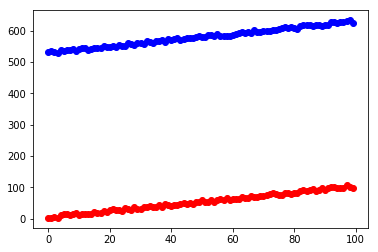

In [74]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape = (numPoints, 3))
    y = np.zeros(shape = numPoints)
    
    for i in range(numPoints):
        # input x
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        
        # target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance + 500
    return x, y

# generate 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)
plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

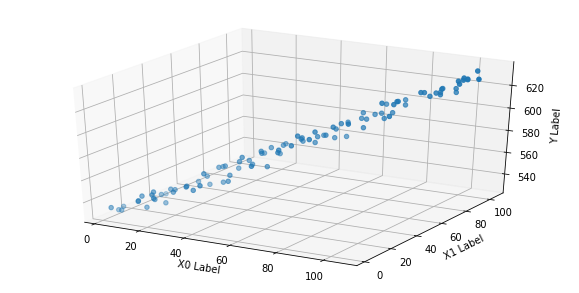

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [77]:
def compute_cost(x, y, weight):    
    #Number of training samples
    m = y.size
    predictions = x.dot(weight)
    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * np.sum(sqErrors)
    return J

In [78]:
def minimize_gradient(x, y, weight, iterations=100000, alpha=0.01):
    
    m = y.size
    cost_history = []
    weight_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(weight)        
        for i in range(weight.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            weight[i] = weight[i] - alpha * (1.0 / m) * errors_xi.sum()
        
        if _ % 1000 == 0:
            weight_history.append(weight)
            cost_history.append(compute_cost(x, y, weight))

    return weight, np.array(cost_history), np.array(weight_history)

In [79]:
weight_initial = np.ones(3)

weight, cost_history, weight_history = minimize_gradient(
        x, y, weight_initial, 300000, 0.0001)
print("weight", weight)

weight [5.60483580e-01 4.39881601e-01 5.24986247e+02]


In [80]:
from sklearn import  linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# # The coefficients
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [0.55267988 0.43818843]
intercept:  525.6484898931561


In [81]:
print(np.dot(weight, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

536.038505514719
[536.59370246]


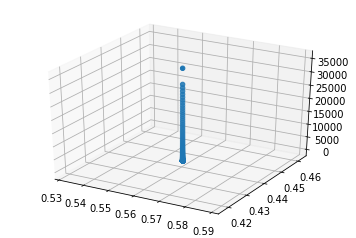

In [82]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(weight_history[:,0], weight_history[:,1], cost_history, zdir="z")
plt.show()

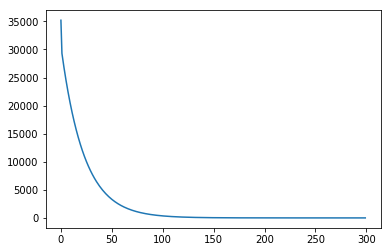

In [84]:
plt.plot(cost_history)
plt.show()